<h1> Homework 4 </h1>
<h2> Logistic regression </h2>

<h3> Importing necesscary libraries </h3>

In [44]:
import pandas as pd
import numpy as np
import math
import sys, pickle
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

<h3>Defining Class Log Regression</h3>

In [45]:
class LogReg:
    def __init__(self,input,label,alpha=0.05,epoch=15,lamb = 0):
        self.input = input
        self.alpha = alpha
        self.epoch = epoch
        self.label = label
        self.weights = 0
        self.lamb = lamb
        
    #pre process data

    def processData(self):

        k1=self.input.to_numpy()
        k2=self.label.to_numpy()
        k=[]
        X=[]
        Y=[]
        temp=[]
        for i in range(k1.size):
            k.append(k1[i][0].split(' '))
        # print(k[1])

        #Converting each string in the input data and lable data to list of integer
        for i in range(len(k)):
            X.append(list(map(int,k[i])))
            Y.append(list(map(int,k2[i])))

        #Converting the labels to binary
        for i in range(len(Y)):
            if (Y[i][0] == 8):
                Y[i][0]=1
            else:
                Y[i][0]=0
        

        #Appending 1 to each input X for compensating for bias term
        for i in range(len(k)):
            X[i].append(1)
    

        #Converting the input X from list of lists to a numpy array
        X=np.array(X)
        return X,Y

    
    #Define train function
    def train(self):

        X,Y = self.processData()

        #Declaring intital weight vectors for each of the class = 8
        w=np.zeros((1,len(X[0])))        
    
        #Training code
        for epo in range(self.epoch):
            g = np.zeros((1,len(X[0])))
            for i in range(10000):
                try:
                    p = 1/(1+np.exp(w.dot(-1*(X[i]))))
                except OverflowError:
                    p=0
                error = Y[i][0]-p
                g = np.add(g  ,((error*X[i])) - 2 * self.lamb * w)
            w = np.add(w,self.alpha*g) 

        with open('lr_weight_vector.pkl','wb') as outFile:
            pickle.dump(w,outFile)
        self.weights=w


    def plotimage(self,imageInterpolationType='nearest'):
        w=np.multiply(self.weights,-1)
        w = np.delete(w, 784)
        w=np.reshape(w,(-1,1))
        scaler = MinMaxScaler(feature_range=(0,255), copy=True)
        wScaled = scaler.fit_transform(w) 
        pixelMap = wScaled.reshape((28,28))
        fig, ax =plt.subplots(figsize=(2,2))
        ax.imshow(pixelMap, cmap='gray', interpolation=imageInterpolationType)
        plt.savefig('weightVector_pixelMap_'+imageInterpolationType+'.png')
        plt.show()

        
    def test(self):
        correctPredictions = 0.
        prediction =1
        X,Y = self.processData()
        for index in range(10000):
            try:
                p = 1/(1+np.exp((self.weights.dot(-1*X[index]))))
            except OverflowError:
                p=0
            if p>0.5: prediction = 1
            else:
                prediction=0
            if Y[index][0] - prediction == 0: correctPredictions+=1
        return (correctPredictions/10000)

C:\Users\hussa\anaconda3\lib\site-packages\ipykernel_launcher.py:62: RuntimeWarning: overflow encountered in exp
C:\Users\hussa\anaconda3\lib\site-packages\ipykernel_launcher.py:94: RuntimeWarning: overflow encountered in exp


Accuracy = 0.9049


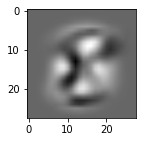

In [46]:
if __name__ == "__main__":
    input = pd.read_csv("inputhw4.csv",header=None)
    label = pd.read_csv("Mnist_labels.csv",header=None)
    log1 = LogReg(input,label,0.05,15)
    log1.train()
    print('Accuracy = ' +str(log1.test()))
    log1.plotimage('bilinear')

<p><b> One can notice a pattern forming the number 8 in the above plot. On comparing the weight vector with the plot I notice that largest weight are mapped to black pixels and smallest weights are mapped tp white pixels and values in between (mostly zeros) are mapped to grey pixels. This way my weights are able to learn a pattern for the number 8. </b> </p>

In [33]:
accu_list = []
lamb_list = [0,0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000]
for l in lamb_list:
    log = LogReg(input,label,0.05,15,l)
    log.train()
    print(log.test())
    accu_list.append(log.test())

C:\Users\hussa\anaconda3\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: overflow encountered in exp
C:\Users\hussa\anaconda3\lib\site-packages\ipykernel_launcher.py:99: RuntimeWarning: overflow encountered in exp


0.9049
0.9026
0.9026
0.9026
0.9026
0.9026
0.9026
0.9026
0.9026
0.9026
0.9026
0.9026
0.9026
0.9026
0.9026
0.9026


([<matplotlib.axis.XTick at 0x182cfe89448>,
 <a list of 16 Text xticklabel objects>)

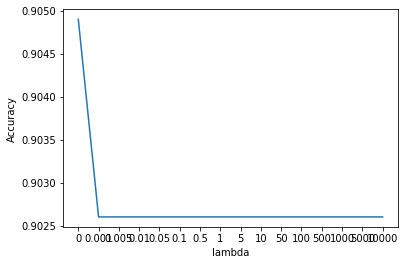

In [34]:
plt.plot(range(len(accu_list)),accu_list)
plt.xlabel('lambda')
plt.ylabel('Accuracy')
plt.xticks(np.arange(len(accu_list)), lamb_list)

<p>From the above graph I see that the accucary is high when my lambda is 0, decreases when lambda increases and then stays constant as my lambda value varies.</p>